In [1]:
import gym
from deep_q_network import DeepQNetwork

In [2]:
env = gym.make('CartPole-v0')
env = env.unwrapped

In [3]:
RL = DeepQNetwork(n_actions=env.action_space.n, n_features=env.observation_space.shape[0], learning_rate=0.01, e_greedy=0.9, replace_target_iter=100, memory_size=2000, e_greedy_increment=0.0008)

episode:  0 ep_r:  2.33  epsilon:  0
episode:  1 ep_r:  10.39  epsilon:  0
episode:  2 ep_r:  2.19  epsilon:  0
episode:  3 ep_r:  4.06  epsilon:  0
episode:  4 ep_r:  1.37  epsilon:  0
episode:  5 ep_r:  9.01  epsilon:  0
episode:  6 ep_r:  1.46  epsilon:  0
episode:  7 ep_r:  0.66  epsilon:  0
episode:  8 ep_r:  3.72  epsilon:  0
episode:  9 ep_r:  4.38  epsilon:  0
episode:  10 ep_r:  3.05  epsilon:  0
episode:  11 ep_r:  1.84  epsilon:  0
episode:  12 ep_r:  7.81  epsilon:  0
episode:  13 ep_r:  3.47  epsilon:  0
episode:  14 ep_r:  12.61  epsilon:  0
episode:  15 ep_r:  4.16  epsilon:  0
episode:  16 ep_r:  0.89  epsilon:  0
episode:  17 ep_r:  1.74  epsilon:  0
episode:  18 ep_r:  4.87  epsilon:  0
episode:  19 ep_r:  4.29  epsilon:  0
episode:  20 ep_r:  2.76  epsilon:  0
episode:  21 ep_r:  8.41  epsilon:  0
episode:  22 ep_r:  4.93  epsilon:  0
episode:  23 ep_r:  4.59  epsilon:  0
episode:  24 ep_r:  8.81  epsilon:  0
episode:  25 ep_r:  3.33  epsilon:  0
episode:  26 ep_r:  

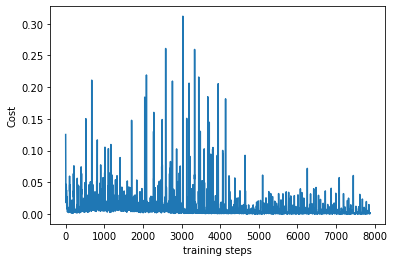

In [4]:
# 记录步数
total_steps = 0
for i_episode in range(100):
    # 获取回合 i_episode 第一个 observation
    observation = env.reset()
    ep_r = 0
    while True:
        # 刷新环境
        env.render()
        action = RL.choose_action(observation)
        observation_, reward, done, info = env.step(action)
        # x 是车的水平位移
        # theta 是棒子离垂直的角度
        x, x_dot, theta, theta_dot = observation_
        # 车越偏离中心, 分越少
        r1 = (env.x_threshold - abs(x)) / env.x_threshold - 0.8
        # 棒越垂直, 分越高
        r2 = (env.theta_threshold_radians - abs(theta)) / env.theta_threshold_radians - 0.5
        reward = r1 + r2   # 总 reward 是 r1 和 r2 的结合, 既考虑位置, 也考虑角度, 这样 DQN 学习更有效率
        # 保存这一组记忆
        RL.store_transition(observation, action, reward, observation_)

        if total_steps > 1000:
            RL.learn()  # 学习

        ep_r += reward
        if done:
            print('episode: ', i_episode,
                  'ep_r: ', round(ep_r, 2),
                  ' epsilon: ', round(RL.epsilon, 2))
            break

        observation = observation_
        total_steps += 1
# 最后输出 cost 曲线
RL.plot_cost()
env.close()